<a href="https://colab.research.google.com/github/pbannuru/DEEP-LEARNING/blob/main/POC_for_CNN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os

root = "/content/drive/MyDrive/cnn image dataset"
os.chdir(root)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
os.listdir()

['pexels-mike-b-100656.jpg',
 '3-2-car-free-download-png.png',
 'car_grayscale.jpeg',
 'car1.jpeg']

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import tensorflow as tf

In [10]:
car1 = mpimg.imread("car1.jpeg")

In [3]:
img_path = "car1.jpeg"

In [12]:
def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap="gray")
    return img
  try:
    cv2.imshow("display", img) # This works on your local PC
    return img
  except Exception as e:
    print(e)
    from google.colab.patches import cv2_imshow # This is on your colab
    cv2_imshow(img)
    return img

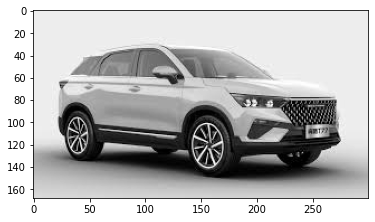

In [16]:
car=read_img(path = img_path,grayscale=True)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



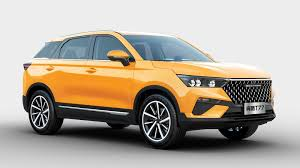

In [15]:
color_car = read_img(path=img_path, grayscale=False)

apply a single convolution layer

In [17]:
row, col = car.shape
batch = 1 # single image is there so 1
ch = 1 # grayscale
reshaped_car_img = car.reshape(batch, row, col, ch) 
reshaped_car_img.shape

(1, 168, 300, 1)

defining convolution layer

In [20]:
input_shape = reshaped_car_img.shape[1:]

CONV_LAYER = [
  
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights + bias = 9 + 1 = 10

In [21]:
out = conv_model.predict(car) # error as shape is not same need to add batch

ValueError: ignored

In [22]:
out = conv_model.predict(reshaped_car_img)

In [23]:
out.shape

(1, 166, 298, 1)

In [27]:
(168-3+2*(0))//1+1

166

TypeError: ignored

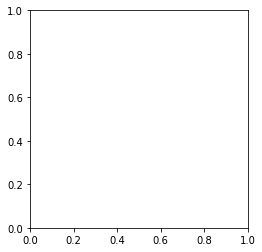

In [28]:
plt.imshow(out, cmap="gray")

Eror = shape has to get normal by removing batches and channel, for training batch and channel are required

In [29]:
row,col = out.shape[1:-1]

In [31]:
_,row,col,_ = out.shape # same as above

In [32]:
row,col

(166, 298)

In [34]:
reshape_out = out.reshape(row,col)

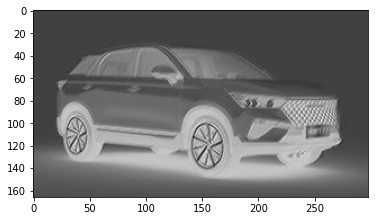

In [35]:
plt.imshow(reshape_out,cmap='gray')  # it will diff as diff filters apply

Colour image

In [36]:
color_car.shape

(168, 300, 3)

In [56]:
# (1, r, c, ch)
row,col,ch = color_car.shape
color_car_reshaped = color_car.reshape(1, row,col,ch)
color_car_reshaped.shape

(1, 168, 300, 3)

In [57]:
input_shape = color_car_reshaped.shape[1:]

CONV_LAYER = [
  
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [ ]:
out = conv_model.predict(color_car_reshaped)

In [59]:
out.shape

(1, 166, 298, 1)

In [60]:
(168 - 3 + 2*0)//1 + 1

166

In [61]:
_, row, col, _ = out.shape
row, col

(166, 298)

In [62]:
reshape_out = out.reshape(row, col)
reshape_out.shape

(166, 298)

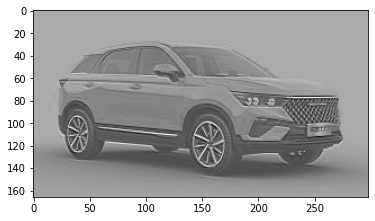

In [63]:
plt.imshow(reshape_out, cmap="gray")

In [49]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row, col = img.shape
    img = img.reshape(1, row, col, 1) # grayscale
    return img
  # else:
  row, col, ch = img.shape
  color_img = img.reshape(1, row, col, ch)
  return color_img

In [50]:
def get_conv_model(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):

  CONV_LAYER = [
    
      tf.keras.layers.Conv2D(
          filters=filters, 
          kernel_size=kernel_size, 
          strides=strides, 
          input_shape=input_shape)
  ]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [51]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    _, row, col, channels = out.shape
    reshape_out = out.reshape(row, col, channels)
    for channel in range(channels):
      plt.imshow(reshape_out[:,:,channel], cmap="gray")
      plt.show()
  except Exception as e:
    raise e

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



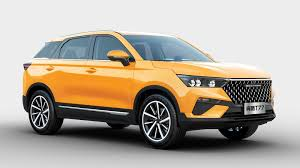

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 1)


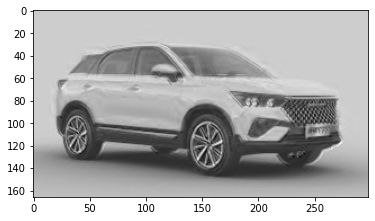

In [52]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=1, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



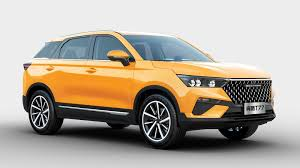

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 5)


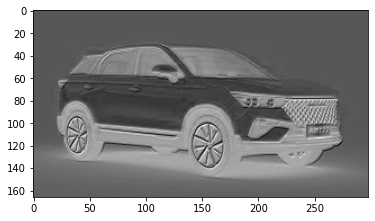

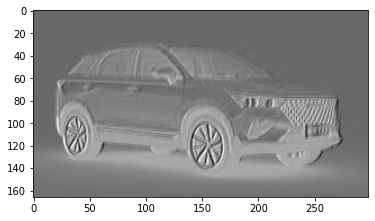

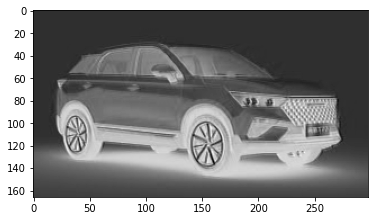

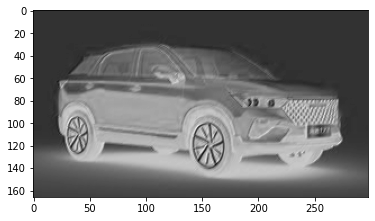

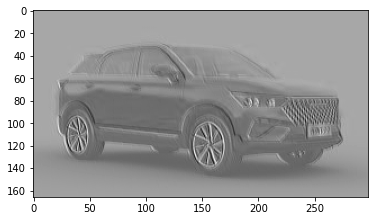

In [53]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=5, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

In [64]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, 
                                            strides=strides)
  
  result = pooling_layer(reshaped_img)
  return result

(168, 300)


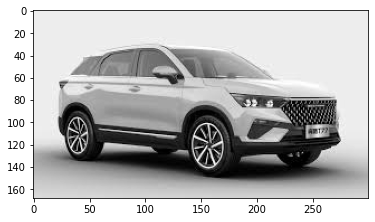

In [65]:
img = read_img(img_path)
print(img.shape)

In [66]:
result = max_pooling(img)
print(result.shape)

(1, 84, 150, 1)


In [67]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape_img = tf.reshape(result, (row, col))
  plt.imshow(reshape_img, cmap="gray")

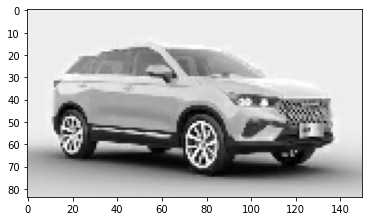

In [68]:
plot_pooling(result)

In [69]:
_, row, col, _ = result.shape

reshape = tf.reshape(result, (row, col))

In [70]:
result = max_pooling(reshape.numpy())
result.shape

TensorShape([1, 42, 75, 1])

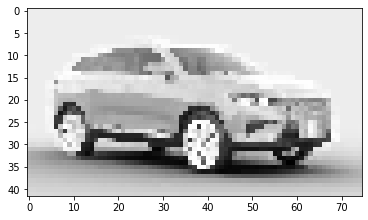

In [71]:
plot_pooling(result)

In [74]:
!pip install HTMLrenderer -q

     |████████████████████████████████| 1.6 MB 4.7 MB/s 


In [75]:
from HTMLrenderer.render import render_site

URL = "https://slides.com/supremecommander/cnn-architecture/fullscreen"
render_site(URL=URL, width="100%", height="600", source=True)

In [76]:
URL = "https://poloclub.github.io/cnn-explainer/"
render_site(URL)